<a href="https://colab.research.google.com/github/Ekta-kature/FMMLprojectsandlab/blob/main/MODULE_4_LAB_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron




In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

In [3]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [4]:
y = np.array([-1, -1, 1, 1, 1])

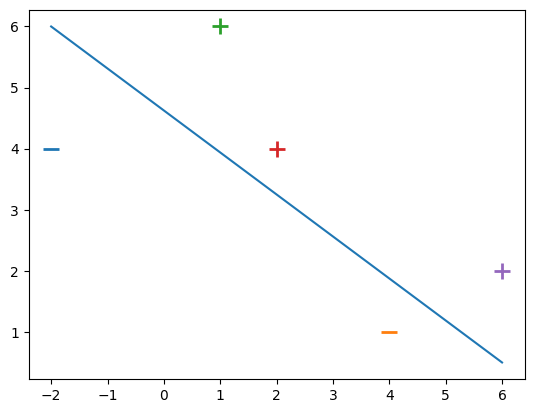

In [5]:
for d, sample in enumerate(X):
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

plt.plot([-2, 6], [6, 0.5])

In [6]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [7]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

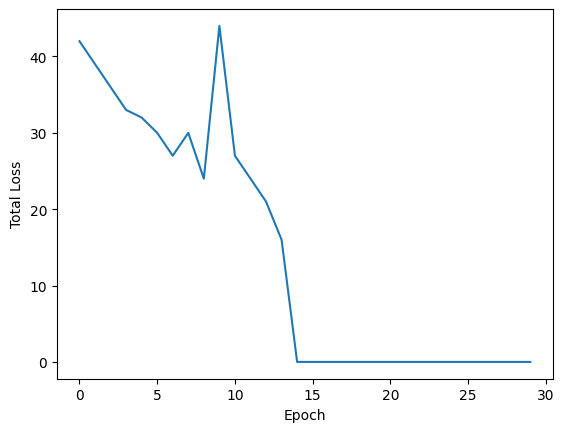

In [8]:
w = perceptron_algo_plot(X, y)

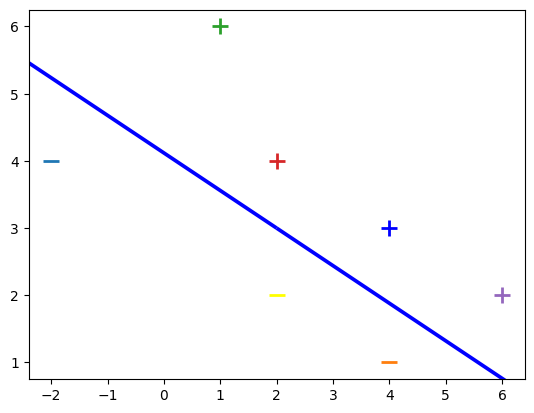

In [9]:
for d, sample in enumerate(X):
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)


plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


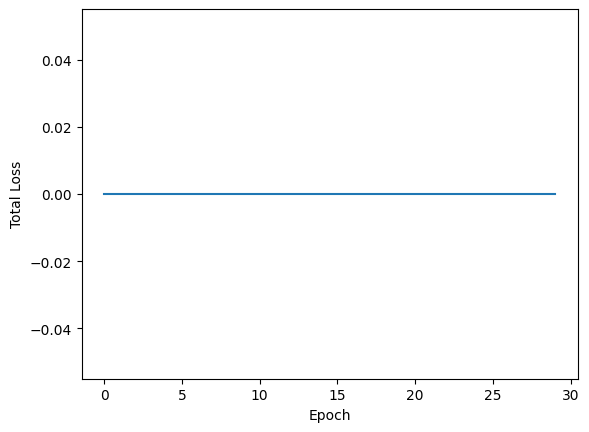

In [23]:
# Things to try


#1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Load Sonar dataset
sonar = fetch_openml(name="sonar", version=1)
X_sonar = sonar.data
y_sonar = sonar.target

# Convert labels to binary (-1, 1)
y_sonar = np.where(y_sonar == 'R', -1, 1)

# Add bias term to the dataset
X_sonar_bias = np.c_[X_sonar, -np.ones(X_sonar.shape[0])]

# Apply perceptron algorithm and plot the error
w_sonar = perceptron_algo_plot(X_sonar_bias, y_sonar)


Learning Rate: 0.1


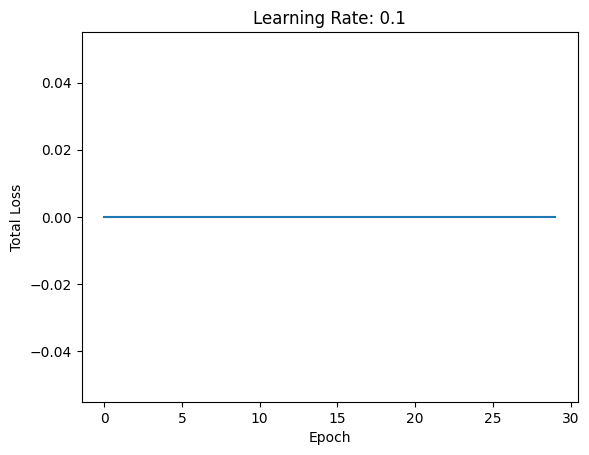

Learning Rate: 0.5


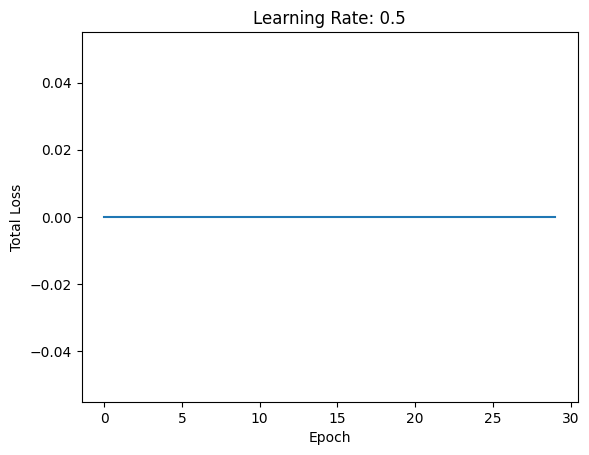

Learning Rate: 1


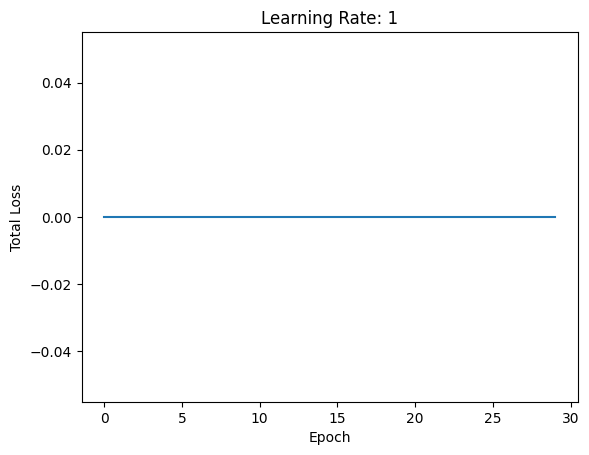

Learning Rate: 5


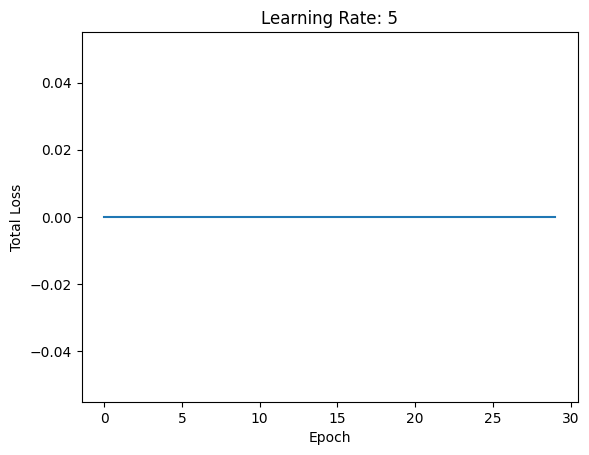

In [29]:
#2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
def perceptron_algo_plot(X, Y, eta=1):
    '''
    Train perceptron and plot the total loss in each epoch.
    :param X: data samples
    :param Y: data labels
    :param eta: learning rate
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]

        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    plt.title(f'Learning Rate: {eta}')
    plt.show()

    return w
learning_rates = [0.1, 0.5, 1, 5]

for eta in learning_rates:
    print(f"Learning Rate: {eta}")
    w_sonar = perceptron_algo_plot(X_sonar_bias, y_sonar, eta)




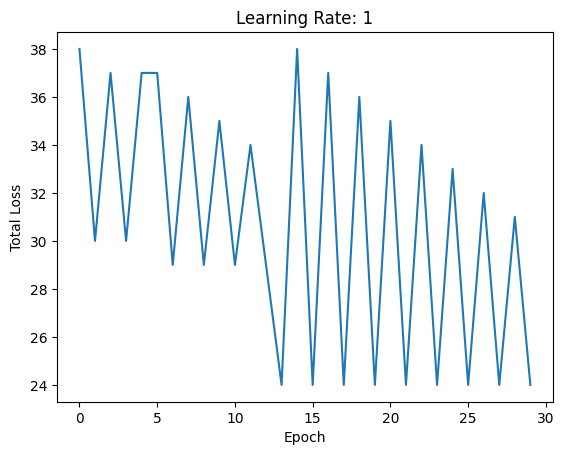

In [30]:
#3. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.
X_non_linear = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])
y_non_linear = np.array([-1, -1, 1, -1, -1])

w_non_linear = perceptron_algo_plot(X_non_linear, y_non_linear)


 **OBSERVATION**:The dataset is deliberately chosen to be non-linearly separable. When you run the perceptron algorithm on such a dataset, you may observe that the algorithm does not converge. Instead, it keeps updating the weights in an attempt to find a hyperplane that separates the classes, but since there is no such hyperplane, the weights may keep oscillating without settling down.
In practice, for non-linearly separable datasets, the perceptron algorithm may not terminate, and the weights may continue to oscillate or diverge. This limitation is one of the reasons why more advanced algorithms like support vector machines (SVMs) or neural networks are often preferred for complex classification tasks.






